# Car Price Prediction

In [1]:
#Reading the dataset

import pandas as pd
df = pd.read_csv('car data.csv')

In [2]:
#Reading the columns an first five rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#checking total rows and columns, we have 8 features and 1 target column(selling price)
df.shape

(301, 9)

In [4]:
#checking the unique values of the categorical features
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [5]:
#Check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
#Removing the car name column as its irrelevant
final_dataset =df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#Adding a new feature as current year which is 2020, this is needed to calculate the age of the car.
final_dataset['Current_year']=2020

In [11]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [12]:
#Arriving at the age of the car.
final_dataset['no_year']=final_dataset['Current_year']-final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [13]:
#Inplace=True is to make it a permanent operation
#Dropping the Year and current year column
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.drop(['Current_year'],axis=1,inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [14]:
#pd.dummies is used to apply one hot encoding technique, drop first is used to drop the first column from creatng dummy variable trap.
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [15]:
#Checking the correlation between various features.
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


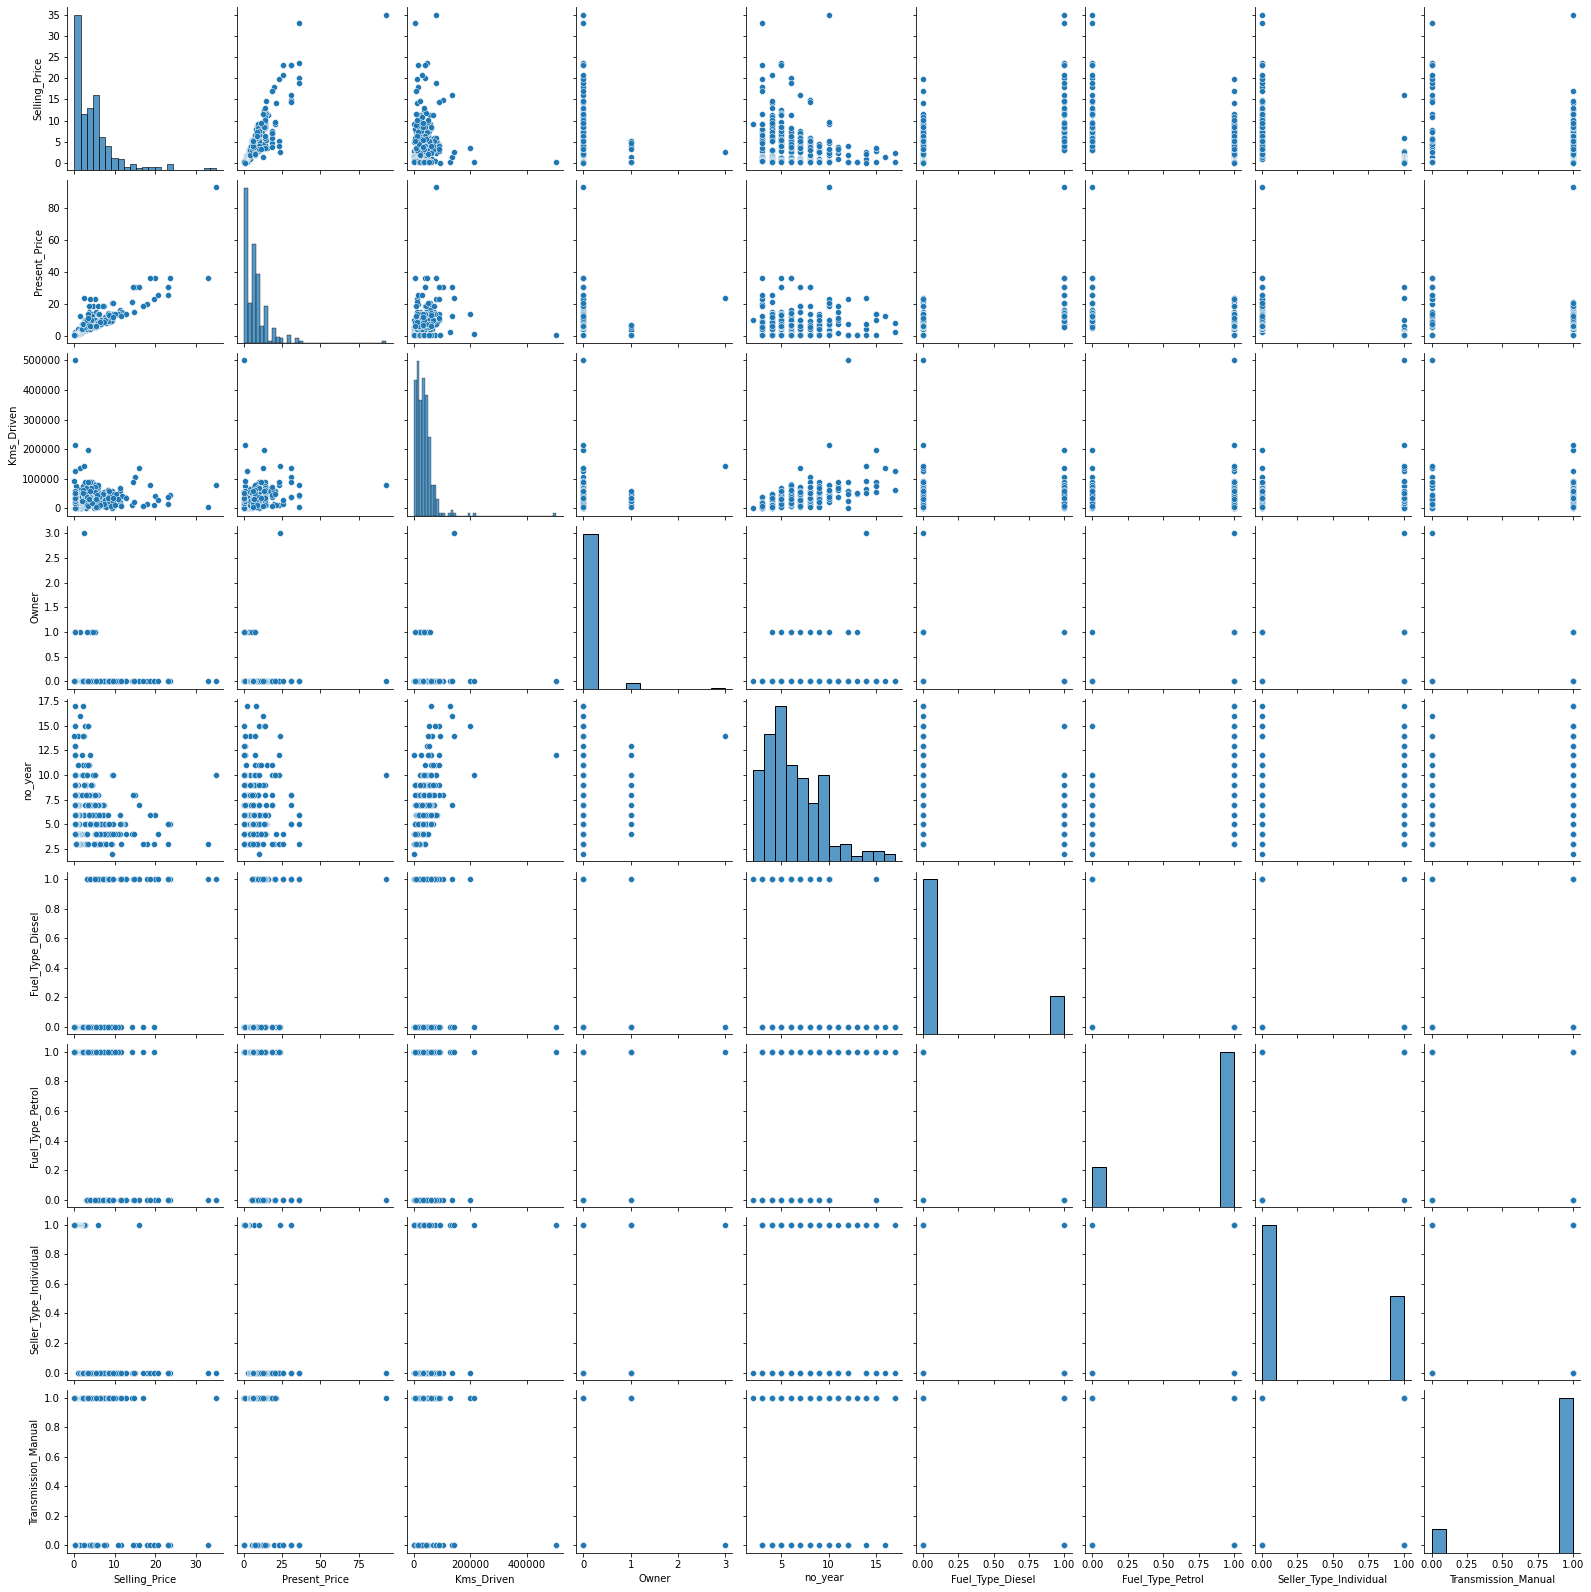

In [16]:
import seaborn as sns
#checking different vizualizations with the various features available  
sns.pairplot(final_dataset)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

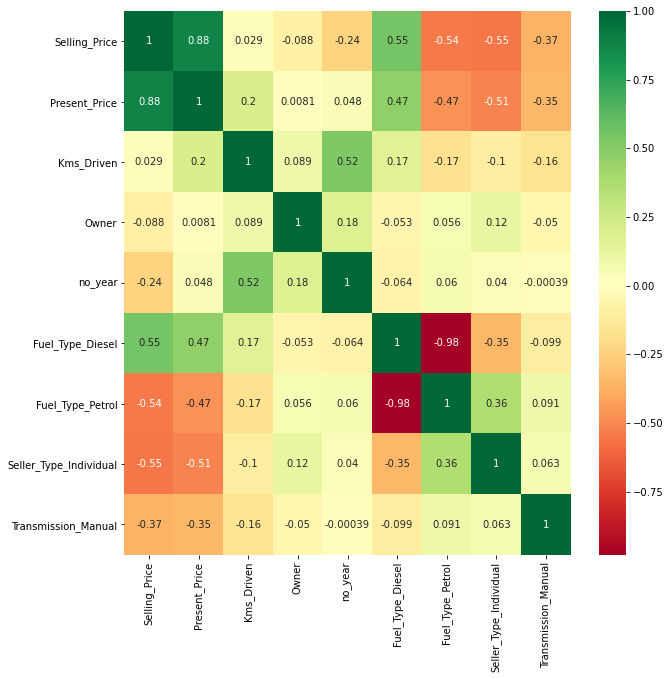

In [18]:
#cormat variable is created to be used ffor creation of a heatmap vizualization 
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn" )

In [19]:
final_dataset.head()
#independent and dependent feature
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [20]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [21]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [22]:
#Feature importance UNderstanding which feature is important
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [23]:
#checking the most important features
print(model.feature_importances_)

[4.02033991e-01 4.09364305e-02 3.22973638e-04 7.78639648e-02
 2.12382443e-01 1.13909331e-02 1.22048287e-01 1.33020977e-01]


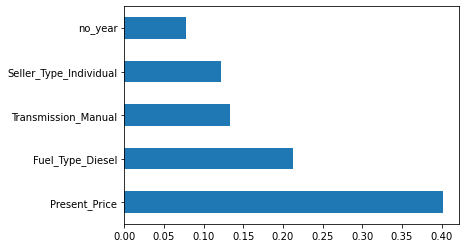

In [24]:
#plot graph for the most important feature
feat_importances=pd.Series(model.feature_importances_,index =x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_random =RandomForestRegressor()

In [27]:
#Hyper parameters
#RandomizedSearchCV helps to find out find best parameters considering how many fmax features, depth etc is used.
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
n_estimators =[int(x) for x in np.linspace(start=100, stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [28]:
#No of trees in the forest
n_estimators =[int(x) for x in np.linspace(start=100, stop=1200,num=12)]
#no of features to consider in every split
max_features=['auto','sqrt']
#max no of levels in a tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Min non of samples needed to split a node
min_samples_split=[2,5,10,15,100] 
#min no of samples needed at each leaf node
min_samples_leaf=[1,2,5,10]

In [29]:
#create a random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()

In [31]:
rf_random.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
predictions = rf_random.predict(x_test)

In [33]:
predictions

array([ 2.955 ,  0.3734,  5.704 ,  3.9196,  6.137 ,  0.1837,  6.667 ,
        0.435 ,  4.591 ,  7.1815, 11.158 ,  8.6165, 20.8015,  3.211 ,
        9.6555,  0.5168,  2.5575,  7.3125,  1.1192,  2.3356,  0.4649,
        2.7675,  1.15  ,  0.4484,  1.099 ,  3.0705,  0.6114,  8.7185,
        3.1635,  2.3465,  0.5763,  0.4681,  0.2122,  0.3726,  1.1795,
        4.094 ,  0.45  ,  0.1869,  4.2935,  5.821 , 11.1254,  3.153 ,
        0.3109,  2.7855,  2.9055,  4.6754,  0.4691, 20.8015,  8.5659,
        6.295 ,  8.2835,  0.2159,  1.1273,  8.7338,  0.4261,  2.8085,
        0.4508,  9.3733,  6.3125,  3.991 ,  0.5971])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

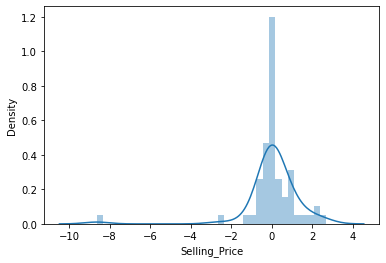

In [34]:
#Checking the difference from our pedictions to our actuals
sns.distplot(y_test-predictions)

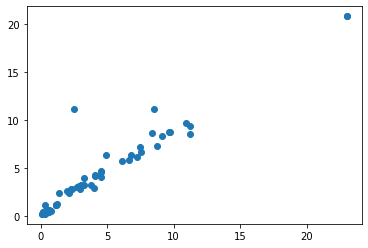

In [35]:
#Creating vizualizations comaring our predictions with our actual values.
plt.scatter(y_test,predictions)

In [36]:
import pickle 
#open a file where you can store the data
#file =open('random_forest_regression_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random,open('random_forest_regression_model.pkl','wb'))